# Viterbi Search

최적의 경로를 찾는 탐색법


중요성: 일련의 event sequence에서 이전 event를 반영하여 최적의 path를 찾아낼 수 있다는 점에서 가치있는 탐색법으로 사용될 수 있습니다.


적용: Part-of-Speech Tagging (POS tagging)에 사용될 수 있습니다. 예로는 문장이 존재할 때 각 문장을 구성하는 단어의 품사를 tagging한다고 할 때 사용될 수 있습니다. 또한 음성 인식, 음성 합성, 화자 구분, 키워드 검출, 전산언어학, 생물정보학 분야에서도 널리 활용되고 있습니다. 음성 인식(Speech to Text)에서는 음향 신호를 관측된 사건들의 순서라고 하면, 문자열은 이러한 음향 신호를 야기한 "숨겨진 원인(hidden cause)"으로 간주됩니다. 이 때 비터비 알고리즘은 주어진 음향 신호에 대한 가장 가능성 높은 문자열을 찾아내는데 사용됩니다.

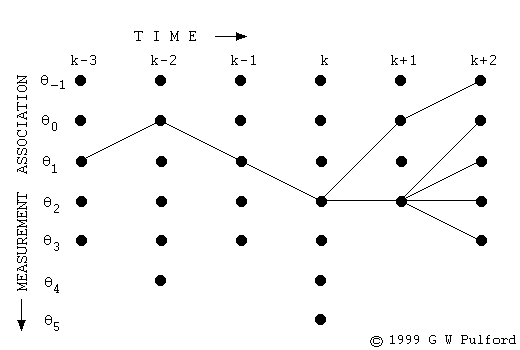

# HMM (Hidden Markov Model)

Markov Model은 현재 일어날 확률이 바로 이전의 확률에만 영향을 받는 확률 모델

이를 기반으로 Viterbi Search를 구현합니다.

# Viterbi Algorithm

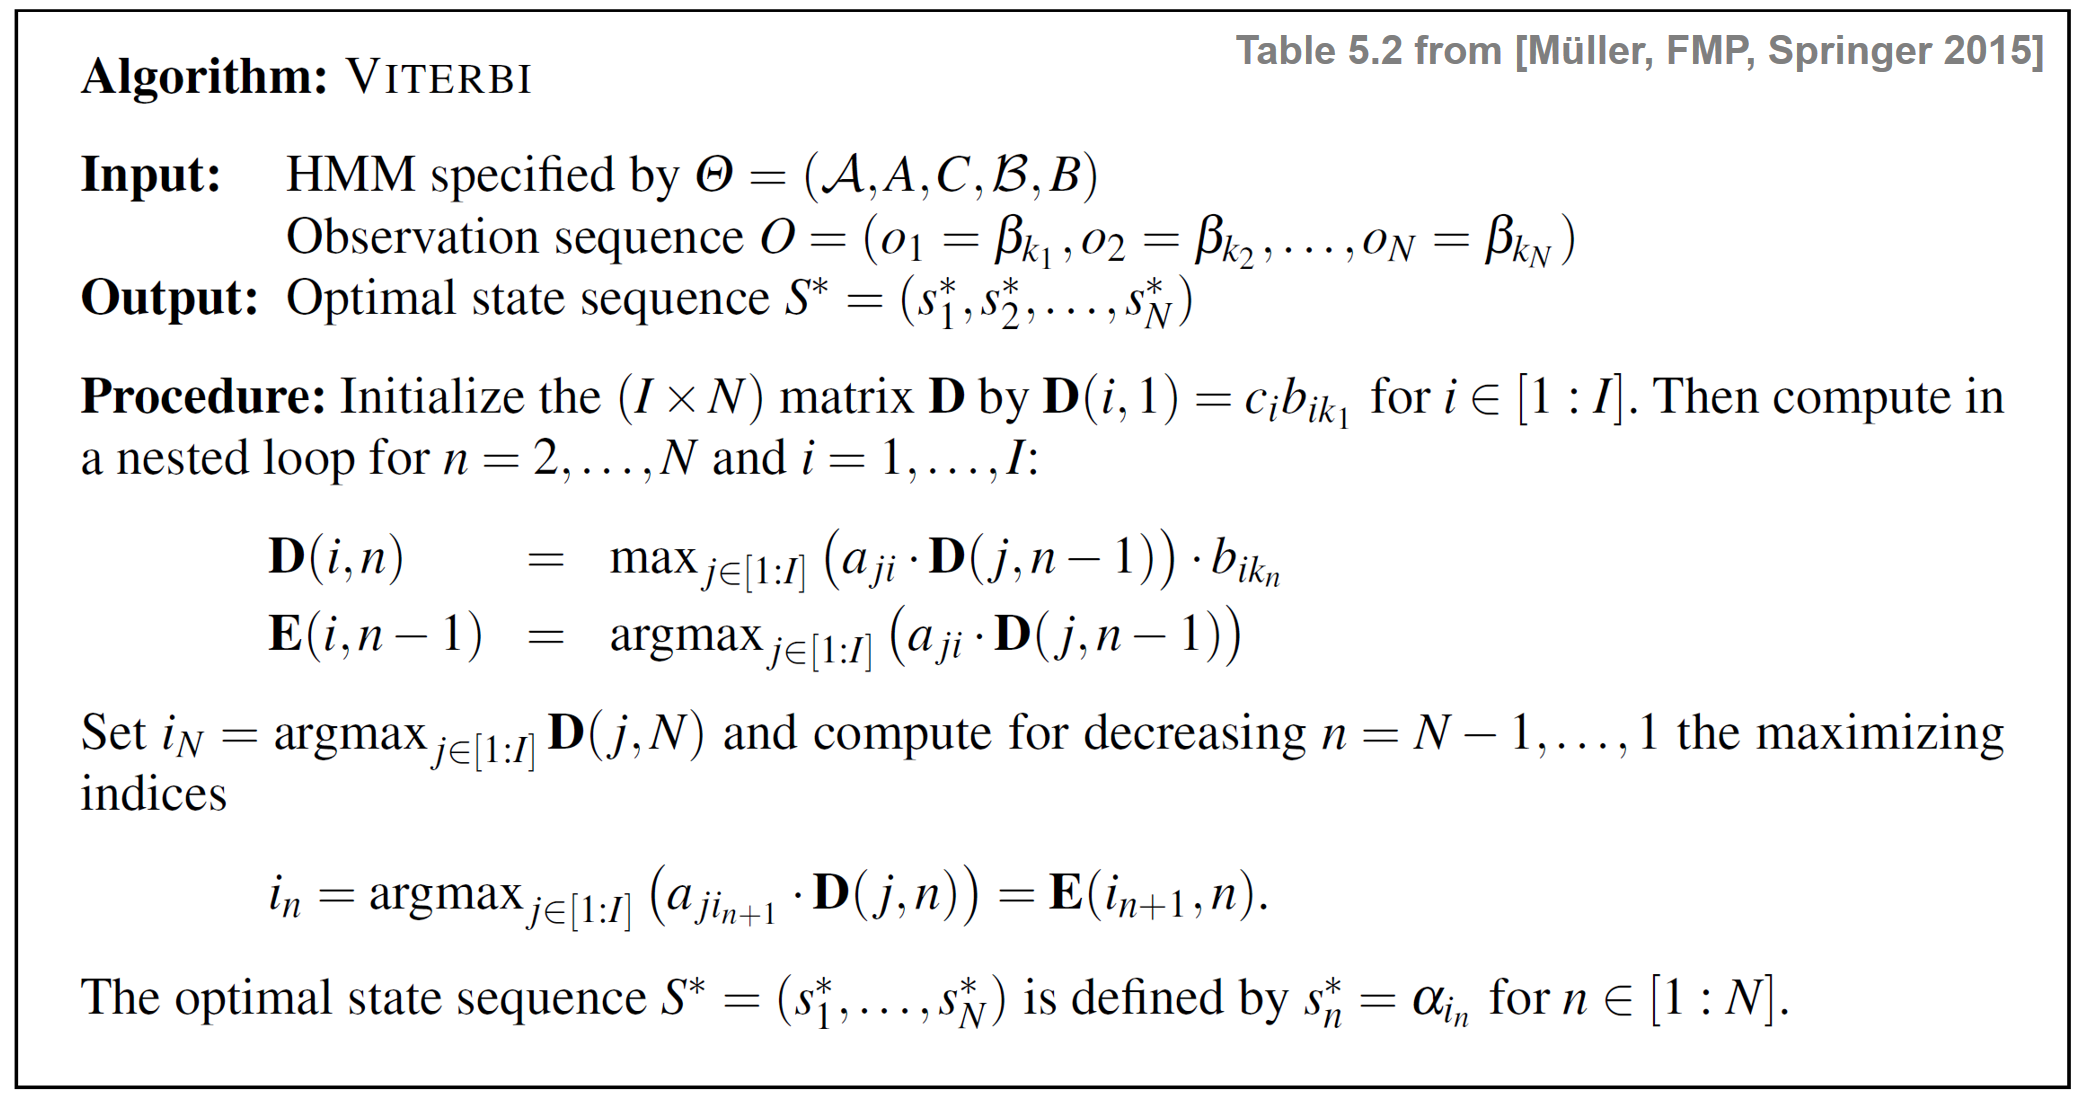


동적계획법의 원리와 비슷하게 구현 가능합니다.


ⓐ Observation의 길이 * state의 길이의 Matrix를 생성합니다.


ⓑ 처음 step의 state의 값을 초기화하여 생성한 Matrix에 저장합니다.


ⓒ 각 state에 대해 전 step에서 전이 됐을 때의 최적값을 생성한 Matrix에 저장합니다.


ⓓ 2번째 step부터 마지막 step까지 ⓑ, ⓒ를 반복합니다.

In [1]:
import numpy as np

# Viterbi algorithm

def viterbi(A, C, B, Obs_seq):
    
    I = A.shape[0]    # number of states
    N = Obs_seq.shape[1]  # length of observation sequence
    
    # initialize D and E matrices
    D = np.zeros([I, N])
    E = np.zeros([I, N-1])
    D[:, 0] = np.multiply(C, B[:, 0])
    
    # compute D and E in a nested loop
    for n in range(1, N):
        for i in range(I):
            temp_product = np.multiply(A[:, i], D[:, n-1])
            D[i,n] = np.amax(temp_product) * B[i, Obs_seq[0, n]-1]
            E[i, n-1] = np.argmax(temp_product)
            
    max_ind = np.zeros([1, N])
    max_ind[0, -1] = np.argmax(D[:, -1])
    
    # Backtracking
    for n in range(N-2, 0, -1):
        max_ind[0, n] = E[int(max_ind[0, n+1]), n]
    
    # Convert zero-based indices to state indices
    S_opt = max_ind.astype(int)+1
    
    return S_opt

In [2]:
# Define model parameters

A = np.array([[0.8, 0.1, 0.1], 
              [0.2, 0.7, 0.1], 
              [0.1, 0.3, 0.6]])

C = np.array([[0.6, 0.2, 0.2]])

B = np.array([[0.7, 0.0, 0.3], 
              [0.1, 0.9, 0.0], 
              [0.0, 0.2, 0.8]])

Obs_seq = np.array([[1, 3, 1, 3, 3, 2]])

# Apply Viterbi algorithm
S_opt = viterbi(A, C, B, Obs_seq)

print('Observation sequence:   '+str(Obs_seq))
print('Optimal state sequence: '+str(S_opt))

Observation sequence:   [[1 3 1 3 3 2]]
Optimal state sequence: [[1 1 1 3 3 2]]
